
*   https://www.youtube.com/watch?v=W8AeOXa_FqU&ab_channel=DotCSV
*   https://www.aprendemachinelearning.com/una-sencilla-red-neuronal-en-python-con-keras-y-tensorflow/
*   https://unipython.com/desarrolla-primera-red-neural-python-keras-paso-paso/
*   https://rua.ua.es/dspace/bitstream/10045/93593/1/Recopilacion_de_informacion_sobre_futbol_y_prediccion_Bardisa_Serrano_Adrian.pdf
*   https://www.aprendemachinelearning.com/pronostico-de-series-temporales-con-redes-neuronales-en-python/
*  https://anderfernandez.com/blog/como-programar-una-red-neuronal-desde-0-en-python/


#Creando una red neuronal propia V1
con inferencia 100%


##P1. importando librerias

In [1]:
import numpy as np    #procesamiento numerico
import scipy as sc    #extensión de numpy 
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles    #nos permite crear un dataset

##P2. creando el dataset

dataset X= (500, 2)
dataset Y= (500, 1)


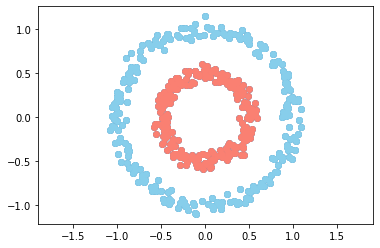

In [2]:
#make_circles?    #para ver como se usa la funcionalidad
n = 500  # 500 elementos, ejemplo: personas
p = 2    # 2 caracteristicas de cada uno de los 500 elementos, ejemplo: edad, altura, sexo, peso...etc
# x= puntos en (x,y) del eje carteciano
# y= valores binarios (0,1) que dicen que pertenecen al ciclo interno o externo
X, Y= make_circles(n_samples=n, factor=0.5, noise=0.05)   #factor= distancia entre los circulos, noise= ruido
Y= Y[:, np.newaxis]      #agregamos una dimensión para que quede igual que X
print("dataset X= {}".format(X.shape))
print("dataset Y= {}".format(Y.shape))
#visualizamos el dataset
plt.scatter(X[:,0], X[:,1])  #todos los puntos en la primera coordenada en X y los segundos puntos en coordenada Y
#mejoramos el grafico (agreamos color)
plt.scatter(X[Y[:,0]==0,0], X[Y[:,0]==0,1],c="skyblue")  
plt.scatter(X[Y[:,0]==1,0], X[Y[:,0]==1,1],c="salmon")  
plt.axis("equal")   #los ejes X y Y sean iguales
plt.show()


##P3. creando una red neuronal

In [3]:
#estructura de datos de la red:
#  parametros de entrada
#  conexiones entre las capas      = n_conn
#  número de neuronas en las capas = n_neur 
#  funcion de activación           = f_activar

#clase de la capa de la red
class neural_layer():
  def __init__(self, n_conn, n_neur,f_activar):
    self.f_activar=f_activar
    self.b = np.random.rand(1,n_neur)*2 -1   #vector parametro de bayas (layers de la red neuronal )valores entre -1 y 1
    self.W = np.random.rand(n_conn,n_neur)*2 -1   #matriz layer (conexiones son tantas como neuronas en cada capa)


###P3.1 funciones de activación

In [4]:
#funciones de activación de las neuronas
#funcion sigmoide (s)
#sigm= lambda x: 1/(1+np.e**(-x))   #modo funcion anonima en python (es una función sin nombre)
# podemos compertir sigm en dos funciones
sigm= (lambda x: 1/(1+np.e**(-x)),   # funciones sigmoide
       lambda x:  x* (1-x))          # derivada de la funcion sigmoide

relu = lambda x: np.maximum(0,x)     # todos los valores que sean negativos seran cero
      

###P3.2 funcion de coste (error cuadratico medio = L2)

In [5]:
l2_cost = (lambda Yp, Yr :np.mean((Yp-Yr)**2),    #obtiene error cuadratico medio de la diferencia entre Yp: valor predicho, Yr: valor real
           lambda Yp, Yr :(Yp - Yr))              #derivada de la funcion de error cuadratico medio         

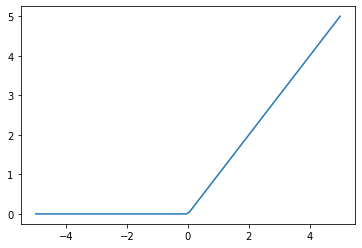

In [6]:
#probemos la función sigmoide
_x= np.linspace(-5,5, 100)   #creamos un vector del 100 posiciones con valores desde -5 a 5
_x
#plt.plot (_x, sigm[0](_x))  #funcion sigmoide
#plt.plot (_x, sigm[1](_x))  #derivada de la funcion sigmoide
plt.plot (_x, relu(_x))  #derivada de la funcion sigmoide

##P4. Creamos la red

In [7]:
#metodo manual
l0= neural_layer(p,4,sigm)   #capa 0 con p (numero de entradas)
l1= neural_layer(4,8,sigm)   #capa 1

In [8]:
#metodo automatico 

def create_nn(topology, f_activar):
 
  nn=[]                                                             #capas de la red neuronla (nn)
  for l, layer in enumerate(topology[:-1]):                         #recorra el vector hasta el ultimo valor 
    nn.append(neural_layer(topology[l],topology[l+1], f_activar))   #creamos cada una de las capas
  return nn

##P5. creamos la funcion de entrenamiento (train)

In [9]:
#le entregamos a la nn un parametro de entrada y como es la salida y ella solita aprende
#  a asignar pesos hacia adelante aplicando sumas ponderadas y funciones de activación (sigm) para obtener un valor randomico
# aplicando una funcion de coste (error cuadratico medio = L2 ) comparamos el valor de salida randomico - valor real y obtenemos el valor de error
# tomamos ese error y aplicamos el algoritmo de back_propagation para calcular las derivadas parciales que usaremos para
# usar el algoritmo de descenso por gradiente que nos permitra optimizar el error de coste y con ello entrenamos la nn.

#topology=[p,4,8,16,8,4,1]                #cantidad de neuronas en cada capa (muchas capas para tan pocos datos)
topology=[p,4,8,1]                        #cantidad de neuronas en cada capa
neural_net= create_nn(topology, sigm)            #nn con 2 capas ocultas del tipo neural_layer


def train(neural_net, X, Y, l2_cost,lr=0.05, train=True):     #lr= define en que grado de actualización los parametros en base al descenso gradiente (muy bajo= train lento, muy alto=nunca converge la red )
  #forward pass (hacia adelante), pasamos el vector de entrada y lo pasamos capa por capa
  
  #capa 0
  z= X@ neural_net[0].W + neural_net[0].b    #suma ponderada en la primera capa
  a= neural_net[0].f_activar[0](z)              #ejecutamos la activación usando la funcion sigm [parametro 0] para la capa 0
  
  #vector con los resultados de las capas [(z0, a0)],[(z1,a1)]...[(zn,an)]
  out=[(None,X)]    #cargamos un valor inicial que se usara en la primera capa (entrada)
  #de forma automatica usando un blucle for
  for l, layer in enumerate(neural_net): 
    z= out[-1][1] @ neural_net[l].W + neural_net[l].b    #suma ponderada en la primera capa
    a= neural_net[l].f_activar[0](z)                    #ejecutamos la activación usando la funcion sigm[0] para la capa 0
    out.append((z, a))
  #print(out[-1][1])
  #print("costo del aprendizaje ={}".format(l2_cost[0](out[-1][1],Y)))
  
  #backwards pass  + Gradian Descent
  if train:
    deltas=[]
    
    for l in reversed(range(0, len(neural_net))):  #vamos hacia atras para programar el error y ejecutar (derivada+descenso gradiente)
      z= out[l+1][0]
      a= out[l+1][1]

      #print("tamaño de las capa {} = {}".format(l, a.shape))
      if l==len(neural_net)-1:                   #si es la ultima capa no se debe programar el error xq es el mismo de la función de coste
        deltas.insert(0,l2_cost[1](a,Y)* neural_net[l].f_activar[1](a))  # deltas[0]= agregamos el valor del coste por la derivada de la funcion de activación de la ultima capa
      else:
        #print(deltas[0].shape, _W.shape)
        deltas.insert(0,deltas[0] @ _W.T * neural_net[l].f_activar[1](a))  # deltas[1>]= agregamos el valor del coste por la derivada de la funcion de activación de la capa anterior
      
      _W = neural_net[l].W      #guardamos el valor temporal de W para ser usado en la siguiente iteracción del For
      #descenso gradiente
      neural_net[l].b= neural_net[l].b -np.mean(deltas[0],axis=0, keepdims=True)*lr    #optimizamos el coste en función del parametro W
      neural_net[l].W= neural_net[l].W - out[l][1].T @ deltas[0] *lr    #optimizamos el coste en función del parametro W
                                                
  return out[-1][1]


train(neural_net, X, Y, l2_cost,0.01,True)

array([[0.42564619],
       [0.43798622],
       [0.44062327],
       [0.43869983],
       [0.43427158],
       [0.43457672],
       [0.42376272],
       [0.4227313 ],
       [0.43456134],
       [0.43315358],
       [0.42633716],
       [0.43172092],
       [0.43204187],
       [0.43297934],
       [0.4367524 ],
       [0.43605889],
       [0.44409387],
       [0.44279728],
       [0.43026751],
       [0.4319072 ],
       [0.42946096],
       [0.43146508],
       [0.42678442],
       [0.43570983],
       [0.42327412],
       [0.43872964],
       [0.44099696],
       [0.44297418],
       [0.4392049 ],
       [0.43325059],
       [0.43538858],
       [0.43910002],
       [0.42479146],
       [0.42492452],
       [0.444019  ],
       [0.43415923],
       [0.42888956],
       [0.43292171],
       [0.42875241],
       [0.42969396],
       [0.43778599],
       [0.4398992 ],
       [0.43002384],
       [0.43095608],
       [0.4377534 ],
       [0.44023278],
       [0.43793728],
       [0.429

##P6. entrenamos la Red

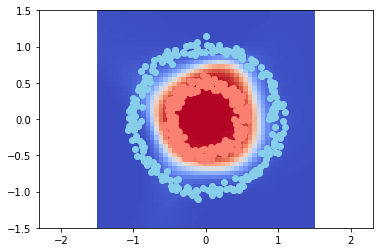

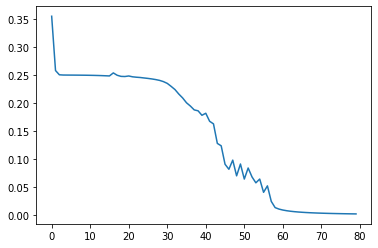

ciclo 1976 --> loss [[0.02704727]
 [0.99169792]
 [0.01996098]
 [0.88645809]
 [0.03739913]
 [0.7802944 ]
 [0.07487249]
 [0.03713377]
 [0.01353767]
 [0.93851167]
 [0.00205104]
 [0.98554902]
 [0.02121067]
 [0.93228384]
 [0.07325725]
 [0.03455543]
 [0.0190331 ]
 [0.01540422]
 [0.00896329]
 [0.98495908]
 [0.99395305]
 [0.01813524]
 [0.03264852]
 [0.99375518]
 [0.03421801]
 [0.96709554]
 [0.02487665]
 [0.01634805]
 [0.07141275]
 [0.06589533]
 [0.0639578 ]
 [0.01268191]
 [0.03425449]
 [0.03563581]
 [0.0025358 ]
 [0.03216462]
 [0.06473284]
 [0.02690721]
 [0.9762699 ]
 [0.99257646]
 [0.99331159]
 [0.92473228]
 [0.98570867]
 [0.98328698]
 [0.07028354]
 [0.02475258]
 [0.94514761]
 [0.97975216]
 [0.03755238]
 [0.98865682]
 [0.02254254]
 [0.03608413]
 [0.02077294]
 [0.96804879]
 [0.01432757]
 [0.98553769]
 [0.98607305]
 [0.93370547]
 [0.98828824]
 [0.96396413]
 [0.95835584]
 [0.84569389]
 [0.98819638]
 [0.0657436 ]
 [0.1026602 ]
 [0.03971603]
 [0.93621803]
 [0.97870715]
 [0.04527106]
 [0.96132588]


In [10]:
import time
from IPython.display import clear_output

neural_n= create_nn(topology, sigm)

loss= []
for i in range(2000):    #1000 pasos de entrenamientos 200.000
  
  #entrenamos la red con un ratio de aprendizaje de 0.03
  pY = train(neural_n, X, Y, l2_cost,lr=0.03)
  print("ciclo {} --> loss {}".format(i,pY))  #imprimir el loss de cada una de las epochs (ciclos de entrenamiento)
  
  if i % 25 ==0:
    loss.append(l2_cost[0](pY,Y))
    
    # de aqui para abajo es lo requerido para visualizar los resultados
    res=50

    _x0= np.linspace(-1.5, 1.5, res)
    _x1= np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res,res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0,i1]= train(neural_n, np.array([[x0,x1]]),Y,l2_cost,train=False)[0][0]
    
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")
    
    plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1], c="skyblue")
    plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)


#Creando una red neuronal propia v2

---
Necesitaremos cuatro métodos de la librería NumPy de Python, estas son:

*  exp: la función exponencial
*  array: permite crear matrices
*  dot: multiplica matrices
*  random: proporciona números aleatorios


In [15]:
from numpy import exp, array, random, dot
#Creamos la red neuronal simple  como una clase de python
class NeuralNetwork():
    def __init__(self):
        # Seed el generador de números aleatorios, con una raíz a fin de generar 
        # los mismo números aleatorios en cada proceso.
        random.seed(1)
 
        # Modelamos una sola neurona, con 3 conexiones de entrada y una conexión de salida
        # Asignamos los pesos aleatorios a una matriz de 3x1, con valores en el rango de -1 a 1
        # y significa 0
        self.synaptic_weights = 2 * random.random((3, 1)) - 1
 
    # La función Sigmoid, que describe una curva en forma de S
    # Se pasan la suma ponderada de las entradas a través de esta función para 
    # normalizarlos entre 0 y 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))
 
    # La derivada de la función Sigmoid.
    # Este es el gradiente de la función Sigmoid.
    # Indica la confianza que tenemos en el peso existente.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)
 
    # Entrenamos a la red neuronal a través de un proceso de prueba y error
    # Se realiza un ajuste de los pesos sinápticos cada vez.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pasar el conjunto de entrenamiento a través de nuestra red neuronal (una sola neurona)
            output = self.think(training_set_inputs)
 
            # Calcular el error(La diferencia entre el resultado deseado
            # y el resultado obtenido).
            error = training_set_outputs - output
 
            # Multiplica el error por la entrada y nuevamente por el gradiente de la curva Sigmoid
            # Esto significa que los pesos menos confiables se están ajustando más
            # Esto significa que las entradas que son cero, no causan cambios en los pesos.
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
 
            # Ajuste de los pesos
            self.synaptic_weights += adjustment
 
    # La red neuronal piensa.
    def think(self, inputs):
        # Pasar las entradas a través de nuestra red neuronal (una neurona)
        return self.__sigmoid(dot(inputs, self.synaptic_weights))
 
 
if __name__ == "__main__":
 
    #Iniciar una red neuronal de una neurona
    neural_network = NeuralNetwork()
 
    print ("Random starting synaptic weights: ")
    print (neural_network.synaptic_weights)
 
    # El conjunto de pruebas. Tenemos cuatro ejemplos, cada uno consiste en 3 valores de entrada
    # y un valor de salida.
    training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = array([[0, 1, 1, 0]]).T
 
    # Entrenar la red neuronal utilizando el conjunto de entrenamiento.
    # Realizar 10000 veces y realizar un ajuste más pequeño cada vez.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)
 
    print ("New synaptic weights after training: ")
    print (neural_network.synaptic_weights)
 
    # Prueba la red neuronal con una nueva situación
    print ("Considering new situation [1, 0, 0] -> ?: ")
    print (neural_network.think(array([1, 0, 0])))


Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Considering new situation [1, 0, 0] -> ?: 
[0.99993704]


#Red neuronal Keras sequential


*   https://torres.ai/deep-learning-inteligencia-artificial-keras/#Implementacion_de_un_modelo_basico_en_Keras
*   http://diegorys.es/2020/02/02/como-crear-una-red-neuronal-con-tensorflow-y-keras/


---
Conjunto de datos sobre la diabetes de indios Pima
https://unipython.com/wp-content/uploads/2018/04/pima-indians-diabetes.csv

1.   Número de embarazos.
2. Concentración de glucosa en plasma a 2 horas en una prueba oral de tolerancia a la glucosa.
3. Presión arterial diastólica (mm Hg).
4. Grosor del pliegue de la piel del tríceps (mm).
5. Insulina sérica de 2 horas (mu U/ml).
6. Índice de masa corporal.
7. Función del pedigrí de la diabetes.
8. Edad (años).
9. **Clase, aparición de diabetes en un plazo de cinco años.**




##P1. Librerias necesarias

In [16]:
import numpy
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense


##P2. cargue de dataset

In [17]:
dataset = numpy.loadtxt("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/1-Machine_Learning_Classic/Databasets/pima-indians-diabetes.csv", delimiter=",")

##P3. Dividir los datos de entrada  y salida (categoria).

In [18]:
X = dataset[:, 0:8]  # X= conjunto de las primeras 8 columnas
Y = dataset[:, 8]    # Y= conjunto de la columna 9
print("Forma de X", X.shape)
print("Forma de Y", Y.shape)

Forma de X (768, 8)
Forma de Y (768,)


##P4. definimos la red neuronal

*   capa oculta 1, que son dos capas en una =
*   -  1° con 8 neuronas (caracteristicas de entrada),  
*   -  2° con 12 neuronas (experimentando)
*   capa oculta 2 (8 neuronas - experimentación)
*   capa salida (binaria) 1 neurona (0 o 1)


---

Se le llama capas densas Xq es una capa de red neuronal densamente conectada con todos los pesos y sesgos con las demas neuronas de la siguiente capa

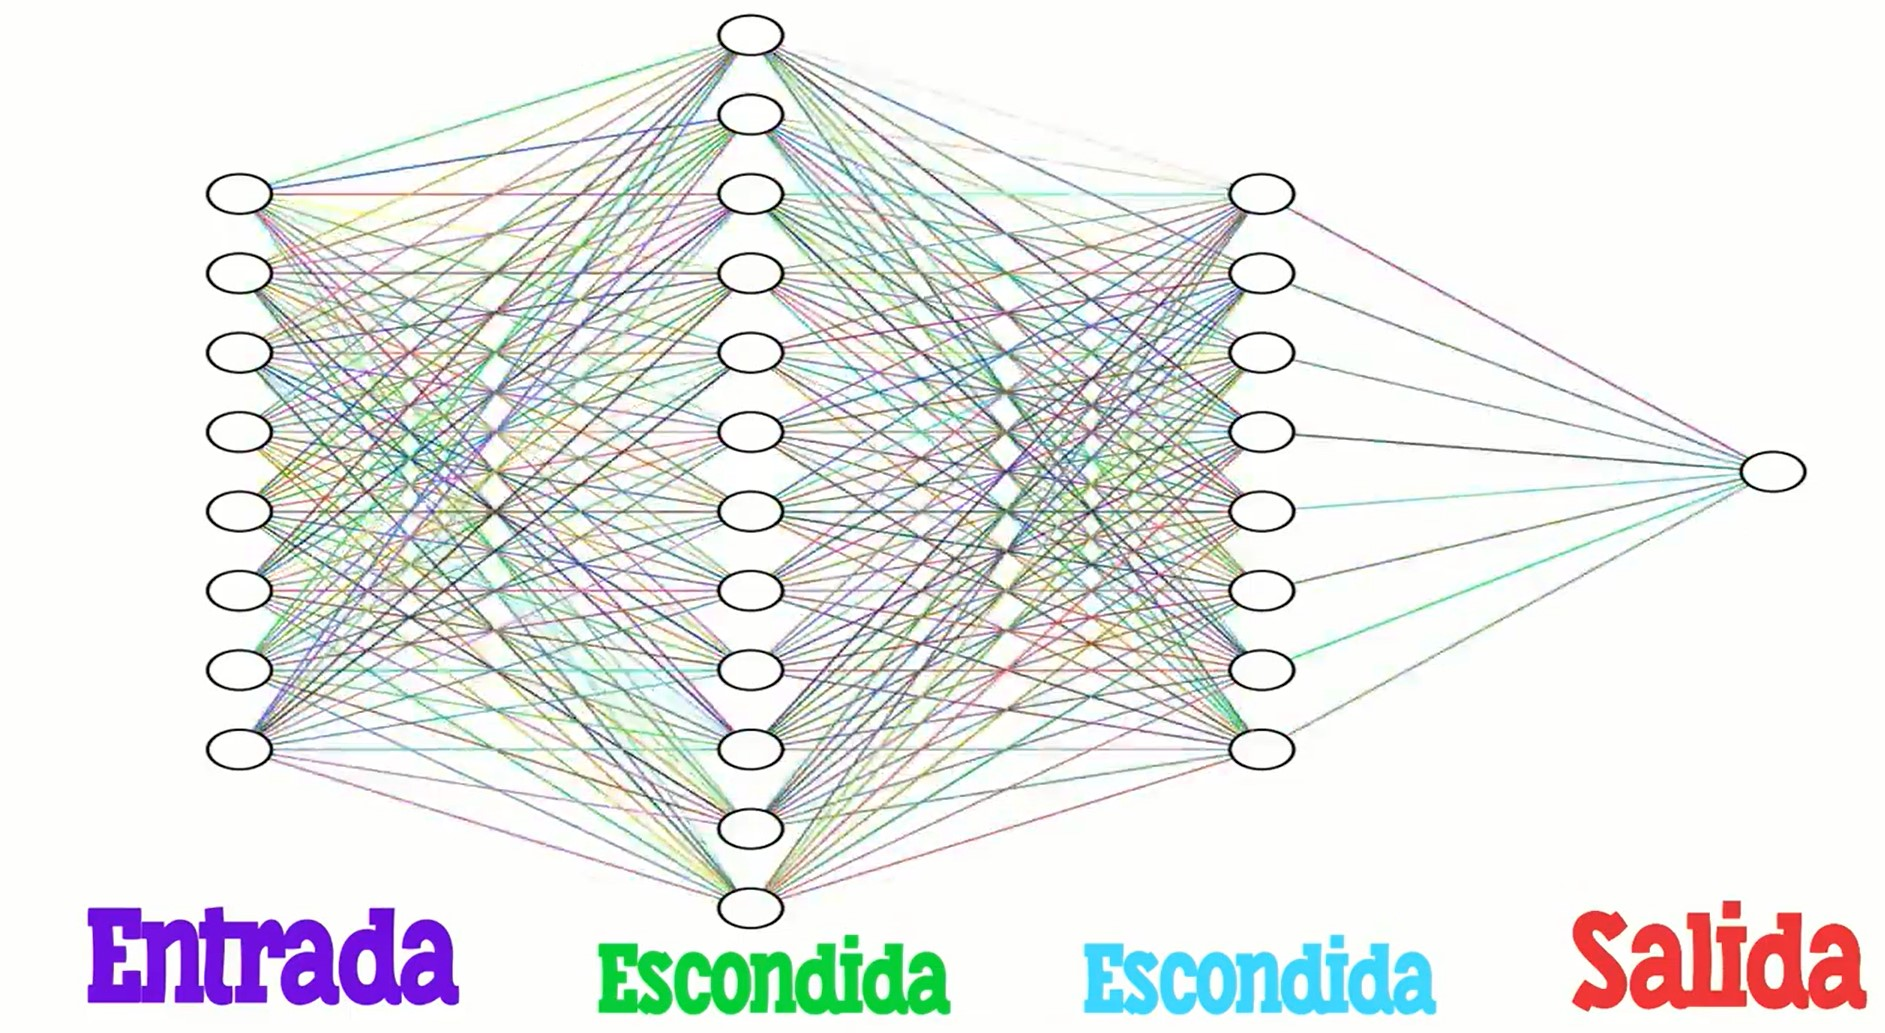

###P4.a creando modelo usando .ADD() 

In [19]:
# crea el modelo
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))   #dos capas en una(1° con 8 neuronas (caracteristicas de entrada), 2° con 12 neuronas  )
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  #al ser una clasificación binaria usaremos sigmoidal
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


###P4.b creando modelo usando una lista

In [20]:
model = Sequential([
    Dense(12, input_dim = 8, activation ="relu"),
    Dense(8, activation= "relu"),
    Dense(1, activation = "sigmoid"),
    ])

##P5.compilación del modelo

*   función de coste: pérdida logarítmica/binary_crossentropy
*   algoritmo de backpropagation: descenso de gradiente eficiente “adam”
*   Debido a que es un problema de clasificación, recopilaremos y reportaremos la exactitud de la clasificación como la métrica.



In [21]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

##P6. Entrenamos

###P6.1 separamos los datos Train y Test

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.3, random_state=42)

###P6.2 entrenamos

In [23]:
# se realizaran 1000 ciclos 
#batch_size=10, registros que son evaluadas antes de que los pesos sean actualizados en la red neuronal. 
historial= model.fit(X_train, Y_train, epochs=2000, batch_size=10)

Epoch 1/2000
54/54 [==============================] - 1s 2ms/step - loss: 16.2235 - accuracy: 0.4041
Epoch 2/2000
54/54 [==============================] - 0s 2ms/step - loss: 4.0720 - accuracy: 0.5363
Epoch 3/2000
54/54 [==============================] - 0s 2ms/step - loss: 2.8765 - accuracy: 0.5531
Epoch 4/2000
54/54 [==============================] - 0s 2ms/step - loss: 1.9509 - accuracy: 0.5419
Epoch 5/2000
54/54 [==============================] - 0s 2ms/step - loss: 1.4294 - accuracy: 0.5940
Epoch 6/2000
54/54 [==============================] - 0s 2ms/step - loss: 1.1998 - accuracy: 0.5866
Epoch 7/2000
54/54 [==============================] - 0s 2ms/step - loss: 1.0745 - accuracy: 0.5829
Epoch 8/2000
54/54 [==============================] - 0s 2ms/step - loss: 0.9840 - accuracy: 0.6201
Epoch 9/2000
54/54 [==============================] - 0s 1ms/step - loss: 0.9123 - accuracy: 0.6369
Epoch 10/2000
54/54 [==============================] - 0s 2ms/step - loss: 0.8554 - accuracy: 0.622

###P6.3 graficamos el entrenamiento

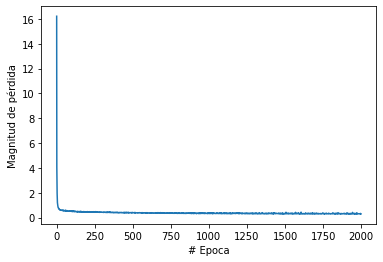

In [24]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

##P7. Evaluar la Red Neuronal



In [ ]:
# evalua el modelo
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

8/8 [==============================] - 0s 2ms/step - loss: 1.2420 - accuracy: 0.6926

accuracy: 69.26%


#Red neuronal Keras (celsius a fahrenheit) F= 1.8 * C+32
------
Nota (red muy boba pero sirve de ejemplo)

In [25]:
Cel = float(input("Los grados en celcios: "))
Far = 1.8 * Cel + 32
print("Celsius: ",Cel, "° Fahrenheit-->",Far,"°")
# y que pasa cuando no conocemos la formula o no existe?

Los grados en celcios: 38
Celsius:  38.0 ° Fahrenheit--> 100.4 °


##P0.importando librerias

In [26]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

##P1. creando la data

In [27]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

##P2. creando el modelo

In [44]:
model2 = Sequential()
model2.add(Dense(3, input_shape=[1], activation ="relu"))   #dos capas en una(1° con 1 neurona (caracteristicas de entrada),  2° 3 neuronas )
model2.add(Dense(3,activation ="relu"))
model2.add(Dense(1,activation = "sigmoid") )
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 3)                 6         
                                                                 
 dense_12 (Dense)            (None, 3)                 12        
                                                                 
 dense_13 (Dense)            (None, 1)                 4         
                                                                 
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________


##P3. compilando el modelo

In [45]:
model2.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

##P4. entrenar modelo

In [46]:
historial2 = model2.fit(celsius, fahrenheit, epochs=2000, verbose=True)

Epoch 1/2000
1/1 [==============================] - 0s 386ms/step - loss: 3331.3928 - accuracy: 0.0000e+00
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 3331.3728 - accuracy: 0.0000e+00
Epoch 3/2000
1/1 [==============================] - 0s 6ms/step - loss: 3331.3528 - accuracy: 0.0000e+00
Epoch 4/2000
1/1 [==============================] - 0s 9ms/step - loss: 3331.3333 - accuracy: 0.0000e+00
Epoch 5/2000
1/1 [==============================] - 0s 13ms/step - loss: 3331.3127 - accuracy: 0.0000e+00
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 3331.2932 - accuracy: 0.0000e+00
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 3331.2729 - accuracy: 0.0000e+00
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 3331.2534 - accuracy: 0.0000e+00
Epoch 9/2000
1/1 [==============================] - 0s 5ms/step - loss: 3331.2329 - accuracy: 0.0000e+00
Epoch 10/2000
1/1 [==============================] -

##P5. viendo grafica de entrenamiento

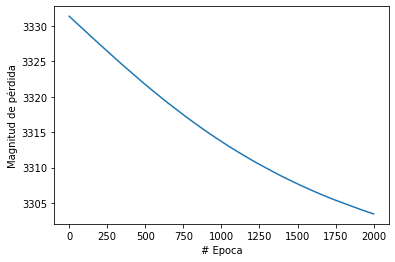

In [47]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial2.history["loss"])

##P6. Haciendo predicciones

In [49]:
print("Hagamos una predicción!")
resultado = model2.predict([30.2])
print("El resultado es ", resultado[0][0] , "% fahrenheit!")

Hagamos una predicción!
El resultado es  0.8514343 % fahrenheit!


#TITANIC con DL

##P1.Importando librerias.

In [38]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Dense

from sklearn import preprocessing # para convertir datos categoricos a numericos
le =preprocessing.LabelEncoder()  #instanciamos el Codificador 

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##P2. cargue del dataset

In [60]:
df_ti = pd.read_csv('/content/drive/MyDrive/CDR.csv', header=0, encoding='utf-8')
df_ti.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,36.926601,38.848099,36.759499,38.848099,37.030922,46013.0
1,2000-01-04,37.594898,38.639198,37.594898,38.012699,36.234600,90735.0
2,2000-01-05,37.386101,37.970901,37.177200,37.803799,36.035469,54291.0
3,2000-01-06,37.720299,38.639198,37.720299,37.970901,36.194759,67689.0
4,2000-01-07,40.519001,43.443001,40.519001,43.443001,41.410892,67172.0


In [61]:
df_ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5807 entries, 0 to 5806
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5807 non-null   object 
 1   Open       5784 non-null   float64
 2   High       5784 non-null   float64
 3   Low        5784 non-null   float64
 4   Close      5784 non-null   float64
 5   Adj Close  5784 non-null   float64
 6   Volume     5784 non-null   float64
dtypes: float64(6), object(1)
memory usage: 317.7+ KB


###P2.1 conociendo la data y corrigiendoda.

In [62]:
#convertir float a int
# convertir datos categoricos a numericos    
# convertir datos categoricos a numericos      

df_ti.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,36.926601,38.848099,36.759499,38.848099,37.030922,46013.0
1,2000-01-04,37.594898,38.639198,37.594898,38.012699,36.234600,90735.0
2,2000-01-05,37.386101,37.970901,37.177200,37.803799,36.035469,54291.0
3,2000-01-06,37.720299,38.639198,37.720299,37.970901,36.194759,67689.0
4,2000-01-07,40.519001,43.443001,40.519001,43.443001,41.410892,67172.0


##P3. Dividir los datos de entrada y salida (categoria).

In [63]:
X = df_ti[['Open','High','Low','Close','Volume']]
y = df_ti['Adj Close']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5807 entries, 0 to 5806
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5784 non-null   float64
 1   High    5784 non-null   float64
 2   Low     5784 non-null   float64
 3   Close   5784 non-null   float64
 4   Volume  5784 non-null   float64
dtypes: float64(5)
memory usage: 227.0 KB


In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25,random_state=42)

##P4. creando el modelo

In [84]:
# crea el modelo
model3 = Sequential()
model3.add(Dense(6, input_dim=5, activation='relu'))   #dos capas en una(1° con 8 neuronas (caracteristicas de entrada), 2° con 12 neuronas  )
model3.add(Dense(12, activation='relu'))
model3.add(Dense(24, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))  #al ser una clasificación binaria usaremos sigmoidal
model3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 6)                 36        
                                                                 
 dense_23 (Dense)            (None, 12)                84        
                                                                 
 dense_24 (Dense)            (None, 24)                312       
                                                                 
 dense_25 (Dense)            (None, 1)                 25        
                                                                 
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________


##P5. compilando modelo

In [87]:
model3.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])

##P6. Entrenando modelo

In [88]:
historial= model3.fit(X_train, Y_train, epochs=100, batch_size=5)

Epoch 1/100
871/871 [==============================] - 2s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 2/100
871/871 [==============================] - 1s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 3/100
871/871 [==============================] - 1s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 4/100
871/871 [==============================] - 1s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 5/100
871/871 [==============================] - 1s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 6/100
871/871 [==============================] - 1s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 7/100
871/871 [==============================] - 1s 2ms/step - loss: nan - acc: 0.0000e+00
Epoch 8/100
871/871 [==============================] - 1s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 9/100
871/871 [==============================] - 1s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 10/100
871/871 [==============================] - 1s 1ms/step - loss: nan - acc: 0.0000e+00
Epoch 11/100
871/871 [=======

##P7.Graficamos el entrenamiento

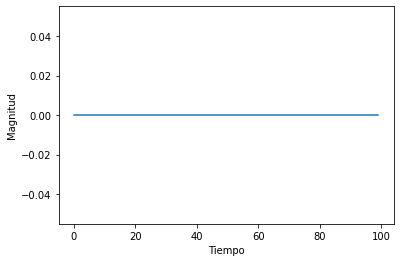

In [92]:
import matplotlib.pyplot as plt
plt.xlabel("Tiempo")
plt.ylabel("Magnitud")
plt.plot(historial.history["acc"])

##P8. Evaluar la Red Neuronal

In [93]:
# evalua el modelo
scores3 = model3.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model3.metrics_names[1], scores3[1]*100))

46/46 [==============================] - 0s 1ms/step - loss: nan - acc: 0.0000e+00

acc: 0.00%


##P9.exportar modelo

In [94]:
model3.save('Mercadeo_Bancario.h5')